<a href="https://colab.research.google.com/github/PedroSAP/Covid19_Genes_Tracker/blob/main/Covid19_Genes_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid19_Genes_Tracker**
By: Pedro Pires (master's student of Bioinformatics and Computational Biology)

This project's primary purpose is to visualize the frequency of polymorphisms in the Sars-CoV-2 genome from the 10 nations with the most frequently reported mutations numbers.

To do this task, the following packages are required as below. 

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
install.packages("openxlsx")
install.packages("lubridate")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Import the data about Sars-CoV-2 polymorphisms on its genome. 

In [5]:
CV19_GenoSamples <- read.csv("/content/covid19-genomics-dataset.csv")
CV19_GenoSamples

Country,Date,Mutation,Gene,Consequence
<chr>,<chr>,<chr>,<chr>,<chr>
USA,2020-9,8782C>T,ORF1A,Synonymous
USA,2020-9,17747C>T,ORF1B,Missense
USA,2020-9,17858A>G,ORF1B,Missense
USA,2020-9,18060C>T,ORF1B,Synonymous
USA,2020-9,28144T>C,ORF8,Missense
USA,2020-9,241C>T,other,Upstream gene
USA,2020-9,1059C>T,ORF1A,Missense
USA,2020-9,3037C>T,ORF1A,Synonymous
USA,2020-9,14408C>T,ORF1B,Missense


The next step is to remove blank/missing values rows and to rename all Genes with frequencies below the threshold of 0.05 (5%) to "others". After that, only the 10 most sampled countries are selected. Finally, the relative frequencies of mutations on Sars-CoV-2 genome are assigned to both "Perc" and "label" variables.

In [6]:
C19_top_10 <- CV19_GenoSamples %>% add_count(Country) %>% group_by(Country, Gene) %>% dplyr::mutate(Gene = na_if(Gene, ""), Gene = case_when(length(Gene)/n <= 0.05 ~ "other", TRUE ~ Gene)) %>% filter(!is.na(Gene)) %>% ungroup() %>%
 filter(dense_rank(desc(n)) <= 10) %>%
 group_by(Country, Gene) %>%
  dplyr::mutate(Perc = n()/ n, label = gsub('^[0](\\.\\d{1,2}).*', '\\1', round(Perc, digits = 2))) 
 C19_top_10

Country,Date,Mutation,Gene,Consequence,n,Perc,label
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
USA,2020-9,8782C>T,ORF1A,Synonymous,533237,0.3150419,.32
USA,2020-9,17747C>T,ORF1B,Missense,533237,0.2143756,.21
USA,2020-9,17858A>G,ORF1B,Missense,533237,0.2143756,.21
USA,2020-9,18060C>T,ORF1B,Synonymous,533237,0.2143756,.21
USA,2020-9,28144T>C,other,Missense,533237,0.1738645,.17
USA,2020-9,241C>T,other,Upstream gene,533237,0.1738645,.17
USA,2020-9,1059C>T,ORF1A,Missense,533237,0.3150419,.32
USA,2020-9,3037C>T,ORF1A,Synonymous,533237,0.3150419,.32
USA,2020-9,14408C>T,ORF1B,Missense,533237,0.2143756,.21


The data is ready to be plotted. With ggplot2 package, we can check the Relative frequency of each gene of Sars-CoV-2 by country.

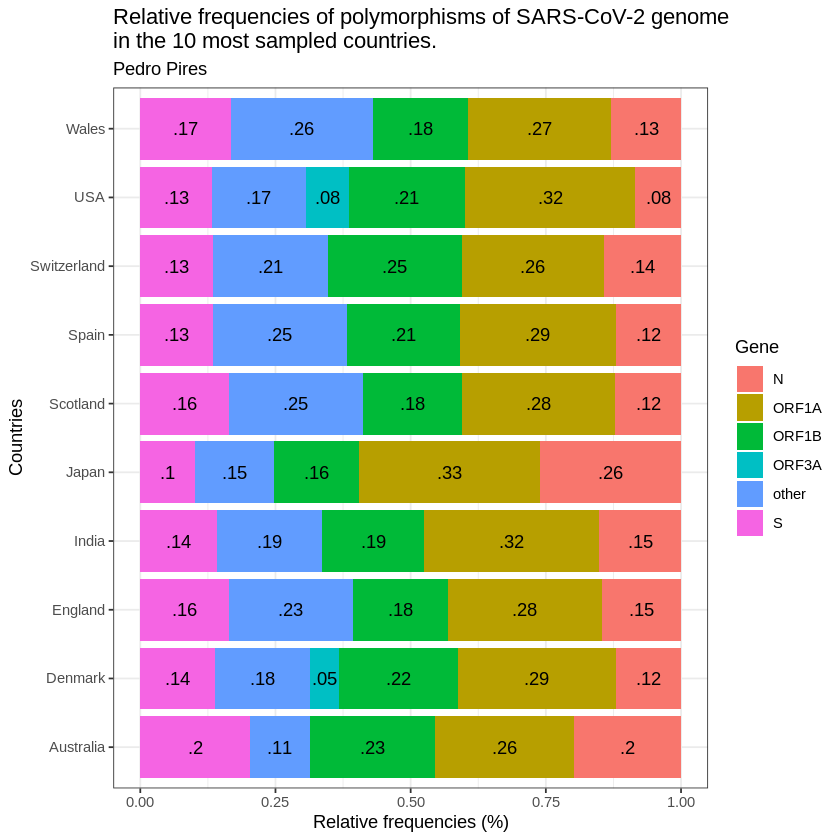

In [7]:
plot_C19_Genes <- ggplot(C19_top_10 %>% group_by(Country, Gene) %>% dplyr::filter(row_number() == 1), aes(x = Country, y = Perc, fill = Gene)) + 
  geom_bar(stat = "identity", position = "stack") +
  geom_text(aes(label = label), position = position_fill(vjust = 0.5), check_overlap = TRUE) +
  coord_flip() +
  theme_bw() +
  labs(x = "Countries", y = "Relative frequencies (%)", colour = "Genes", title = "Relative frequencies of polymorphisms of SARS-CoV-2 genome \nin the 10 most sampled countries.", subtitle = "Pedro Pires")
plot_C19_Genes

   



Now we'll visualize the consequences of polymorphisms in the Coronavirus genome. For that, we must remove again the blank/missing values in the "Gene" variable and count each gene's number in order to group it by its polymorphisms consequences number. Finally, we must calculate the relative frequency of the consequences by each of its genes polymorphisms. 


In [9]:
CV_Genes_Consequences <- CV19_GenoSamples %>% mutate(Gene = na_if(Gene, "")) %>% filter(!is.na(Gene)) %>% add_count(Gene) %>% group_by(Gene, Consequence) %>%
  dplyr::mutate(Perc = n()/ n, label = gsub('^[0](\\.\\d{1,2}).*', '\\1', round(Perc, digits = 2))) 
  CV_Genes_Consequences

Country,Date,Mutation,Gene,Consequence,n,Perc,label
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
USA,2020-9,8782C>T,ORF1A,Synonymous,989328,0.6041687,.6
USA,2020-9,17747C>T,ORF1B,Missense,658799,0.6408814,.64
USA,2020-9,17858A>G,ORF1B,Missense,658799,0.6408814,.64
USA,2020-9,18060C>T,ORF1B,Synonymous,658799,0.3567355,.36
USA,2020-9,28144T>C,ORF8,Missense,82703,0.4069623,.41
USA,2020-9,241C>T,other,Upstream gene,333934,0.8605233,.86
USA,2020-9,1059C>T,ORF1A,Missense,989328,0.3923016,.39
USA,2020-9,3037C>T,ORF1A,Synonymous,989328,0.6041687,.6
USA,2020-9,14408C>T,ORF1B,Missense,658799,0.6408814,.64


Now we can use ggplot2 again to make pie charts in order to see the relative frequencies of the polymorphisms consequences in each gene of Sars-CoV-2.

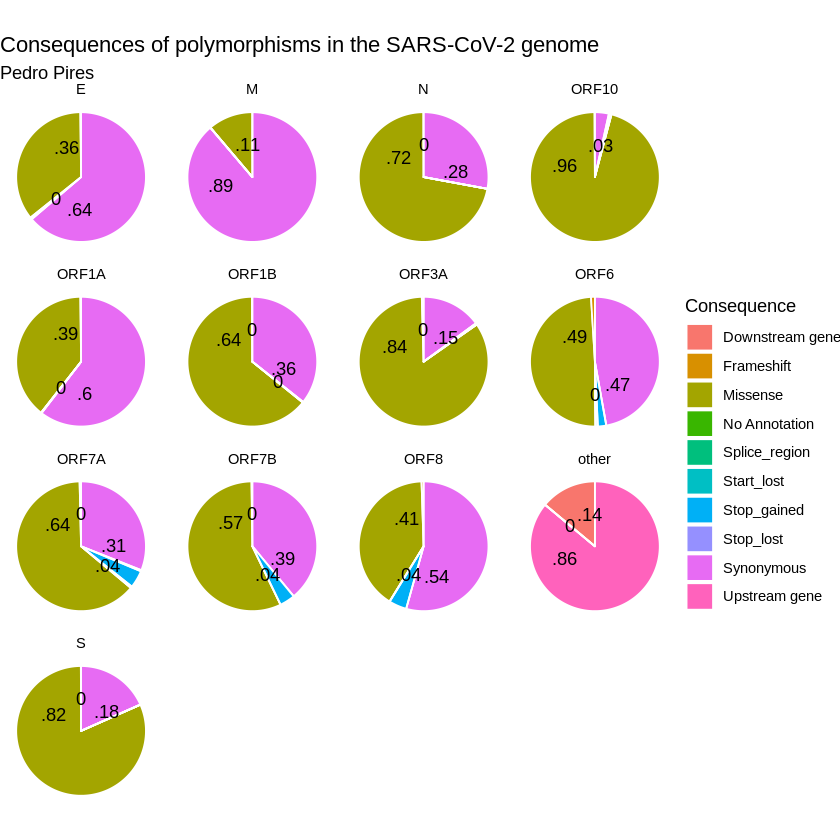

In [27]:
plot_C19_Consequeces <- ggplot(CV_Genes_Consequences %>% group_by(Gene, Consequence) %>% dplyr::filter(row_number() == 1), aes(x = "", y = Perc, fill = Consequence)) + 
  geom_bar(stat = "identity", width=1, color="white") +
  geom_text(aes(label = label), position = position_fill(vjust = 0.8), check_overlap = TRUE) +
  coord_polar("y", start=0) +
  facet_wrap(~Gene) +
  theme_bw() +
  theme_void() + 
  labs(x = "Genes", y = "", colour = "Consequences", title = "Consequences of polymorphisms in the SARS-CoV-2 genome", subtitle = "Pedro Pires")
plot_C19_Consequeces
